# 1. Instalando e importanto bibliotecas necessárias

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
df = pd.read_excel(io='Passport_Stats_31-07-2021_2105_GMT (1).xls', sheet_name='Statistics Data')

In [217]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brand Shares | Local - Historical Owner | Hist...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Geography,Category,Brand Name (GBO),Company Name (NBO),Data Type,2015,2016,2017,2018,2019,2020


Há varias linhas vazias ou com imagens, precisamos removê-las

Verificando quantos missings tem os nossos dados

In [218]:
print('missing...')

missing...


In [219]:
dfnulls = df.isnull().sum()
cols_isnull = list(dfnulls[dfnulls.values>0].index)
print(dfnulls[dfnulls.values>0])

Unnamed: 0      5
Unnamed: 1     10
Unnamed: 2     10
Unnamed: 3     10
Unnamed: 4     10
Unnamed: 5     10
Unnamed: 6     10
Unnamed: 7     10
Unnamed: 8     10
Unnamed: 9     10
Unnamed: 10    10
dtype: int64


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   59 non-null     object
 1   Unnamed: 1   54 non-null     object
 2   Unnamed: 2   54 non-null     object
 3   Unnamed: 3   54 non-null     object
 4   Unnamed: 4   54 non-null     object
 5   Unnamed: 5   54 non-null     object
 6   Unnamed: 6   54 non-null     object
 7   Unnamed: 7   54 non-null     object
 8   Unnamed: 8   54 non-null     object
 9   Unnamed: 9   54 non-null     object
 10  Unnamed: 10  54 non-null     object
dtypes: object(11)
memory usage: 5.6+ KB


In [221]:
df.columns = df.iloc[4]

In [222]:
df.head()

4,Geography,Category,Brand Name (GBO),Company Name (NBO),Data Type,2015,2016,2017,2018,2019,2020
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brand Shares | Local - Historical Owner | Hist...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Geography,Category,Brand Name (GBO),Company Name (NBO),Data Type,2015,2016,2017,2018,2019,2020


In [223]:
df.drop([0,1,2,3,4], axis = 0, inplace = True)

In [225]:
df['Media'] = (df['2015'] + df['2016'] +df['2017'] + df['2018']+df['2018'] + df['2020'])/6

TypeError: can only concatenate str (not "float") to str

In [224]:
df.head()

4,Geography,Category,Brand Name (GBO),Company Name (NBO),Data Type,2015,2016,2017,2018,2019,2020
5,Brazil,Dog Food,Pedigree (Mars Inc),Mars Brasil Alimentos Ltda,Retail Value RSP,15.4,14.2,14.4,14.5,14.9,14.1
6,Brazil,Dog Food,Golden (Grandfood Industria e Comercio Ltda),Grandfood Industria e Comercio Ltda,Retail Value RSP,5.5,7.6,9.5,11.2,12.8,13.9
7,Brazil,Dog Food,Dog Chow (Nestlé SA),Nestlé Brasil Ltda,Retail Value RSP,6.9,6.8,6.7,6.5,6.7,6.3
8,Brazil,Dog Food,Premier (Grandfood Industria e Comercio Ltda),Grandfood Industria e Comercio Ltda,Retail Value RSP,2.7,2.8,2.9,3.1,3.4,3.9
9,Brazil,Dog Food,Lider (Archer Daniels Midland Co),Total Alimentos SA,Retail Value RSP,-,-,-,-,1.9,2


In [226]:
df = df.replace('-', '0')

In [227]:
df.head()

4,Geography,Category,Brand Name (GBO),Company Name (NBO),Data Type,2015,2016,2017,2018,2019,2020
5,Brazil,Dog Food,Pedigree (Mars Inc),Mars Brasil Alimentos Ltda,Retail Value RSP,15.4,14.2,14.4,14.5,14.9,14.1
6,Brazil,Dog Food,Golden (Grandfood Industria e Comercio Ltda),Grandfood Industria e Comercio Ltda,Retail Value RSP,5.5,7.6,9.5,11.2,12.8,13.9
7,Brazil,Dog Food,Dog Chow (Nestlé SA),Nestlé Brasil Ltda,Retail Value RSP,6.9,6.8,6.7,6.5,6.7,6.3
8,Brazil,Dog Food,Premier (Grandfood Industria e Comercio Ltda),Grandfood Industria e Comercio Ltda,Retail Value RSP,2.7,2.8,2.9,3.1,3.4,3.9
9,Brazil,Dog Food,Lider (Archer Daniels Midland Co),Total Alimentos SA,Retail Value RSP,0,0,0,0,1.9,2


In [228]:
df

4,Geography,Category,Brand Name (GBO),Company Name (NBO),Data Type,2015,2016,2017,2018,2019,2020
5,Brazil,Dog Food,Pedigree (Mars Inc),Mars Brasil Alimentos Ltda,Retail Value RSP,15.4,14.2,14.4,14.5,14.9,14.1
6,Brazil,Dog Food,Golden (Grandfood Industria e Comercio Ltda),Grandfood Industria e Comercio Ltda,Retail Value RSP,5.5,7.6,9.5,11.2,12.8,13.9
7,Brazil,Dog Food,Dog Chow (Nestlé SA),Nestlé Brasil Ltda,Retail Value RSP,6.9,6.8,6.7,6.5,6.7,6.3
8,Brazil,Dog Food,Premier (Grandfood Industria e Comercio Ltda),Grandfood Industria e Comercio Ltda,Retail Value RSP,2.7,2.8,2.9,3.1,3.4,3.9
9,Brazil,Dog Food,Lider (Archer Daniels Midland Co),Total Alimentos SA,Retail Value RSP,0,0,0,0,1.9,2
10,Brazil,Dog Food,Nero (Archer Daniels Midland Co),Total Alimentos SA,Retail Value RSP,0,0,0,0,1.9,2
11,Brazil,Dog Food,Alpo (Nestlé SA),Nestlé Brasil Ltda,Retail Value RSP,2.2,2.1,2.1,2,2.1,2
12,Brazil,Dog Food,Faro (Mogiana Alimentos SA),Mogiana Alimentos SA,Retail Value RSP,2,2,2.1,2.1,2,2
13,Brazil,Dog Food,Kanina (Nestlé SA),Nestlé Brasil Ltda,Retail Value RSP,2.1,2,1.9,1.9,1.8,2
14,Brazil,Dog Food,Max (Archer Daniels Midland Co),Total Alimentos SA,Retail Value RSP,0,0,0,0,2.2,1.9


Remover todas as outras linhas que contém NaNs

In [229]:
df = df.dropna()

In [230]:
df

4,Geography,Category,Brand Name (GBO),Company Name (NBO),Data Type,2015,2016,2017,2018,2019,2020
5,Brazil,Dog Food,Pedigree (Mars Inc),Mars Brasil Alimentos Ltda,Retail Value RSP,15.4,14.2,14.4,14.5,14.9,14.1
6,Brazil,Dog Food,Golden (Grandfood Industria e Comercio Ltda),Grandfood Industria e Comercio Ltda,Retail Value RSP,5.5,7.6,9.5,11.2,12.8,13.9
7,Brazil,Dog Food,Dog Chow (Nestlé SA),Nestlé Brasil Ltda,Retail Value RSP,6.9,6.8,6.7,6.5,6.7,6.3
8,Brazil,Dog Food,Premier (Grandfood Industria e Comercio Ltda),Grandfood Industria e Comercio Ltda,Retail Value RSP,2.7,2.8,2.9,3.1,3.4,3.9
9,Brazil,Dog Food,Lider (Archer Daniels Midland Co),Total Alimentos SA,Retail Value RSP,0,0,0,0,1.9,2
10,Brazil,Dog Food,Nero (Archer Daniels Midland Co),Total Alimentos SA,Retail Value RSP,0,0,0,0,1.9,2
11,Brazil,Dog Food,Alpo (Nestlé SA),Nestlé Brasil Ltda,Retail Value RSP,2.2,2.1,2.1,2,2.1,2
12,Brazil,Dog Food,Faro (Mogiana Alimentos SA),Mogiana Alimentos SA,Retail Value RSP,2,2,2.1,2.1,2,2
13,Brazil,Dog Food,Kanina (Nestlé SA),Nestlé Brasil Ltda,Retail Value RSP,2.1,2,1.9,1.9,1.8,2
14,Brazil,Dog Food,Max (Archer Daniels Midland Co),Total Alimentos SA,Retail Value RSP,0,0,0,0,2.2,1.9


In [231]:
df.dtypes

4
Geography             object
Category              object
Brand Name (GBO)      object
Company Name (NBO)    object
Data Type             object
2015                  object
2016                  object
2017                  object
2018                  object
2019                  object
2020                  object
dtype: object

In [235]:
df.columns

Index(['Geography', 'Category', 'Brand Name (GBO)', 'Company Name (NBO)',
       'Data Type', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object', name=4)

In [243]:
anos = ['2015', '2016', '2017', '2018', '2019', '2020']

In [244]:
anos

['2015', '2016', '2017', '2018', '2019', '2020']

In [238]:
list(range(1,11))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [239]:
list(range(2015,2021))

[2015, 2016, 2017, 2018, 2019, 2020]

In [241]:
str(2015)

'2015'

In [242]:
list(map(str, range(2015,2021)))

['2015', '2016', '2017', '2018', '2019', '2020']

In [248]:
cols = list(map(str, range(2015,2021)))

In [249]:
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [250]:
df.dtypes

4
Geography              object
Category               object
Brand Name (GBO)       object
Company Name (NBO)     object
Data Type              object
2015                  float64
2016                  float64
2017                  float64
2018                  float64
2019                  float64
2020                  float64
dtype: object

In [251]:
dfa = df.sort_values(by = ['2020'], axis = 0, ascending = 'False')

In [252]:
dfa

4,Geography,Category,Brand Name (GBO),Company Name (NBO),Data Type,2015,2016,2017,2018,2019,2020
54,Brazil,Dog Food,Nero (Total Alimentos SA),Total Alimentos SA,Retail Value RSP,0.0,0.0,0.0,0.0,0.0,0.0
34,Brazil,Dog Food,Deli-Dog (Nestlé SA),Nestlé Brasil Ltda,Retail Value RSP,0.5,0.5,0.4,0.2,0.1,0.0
35,Brazil,Dog Food,VitalCan (Kowalski Alimentos Ltda),Kowalski Alimentos Ltda,Retail Value RSP,0.3,0.3,0.3,0.2,0.0,0.0
36,Brazil,Dog Food,Beneful (Nestlé SA),Nestlé Brasil Ltda,Retail Value RSP,0.0,0.0,0.0,0.0,0.0,0.0
37,Brazil,Dog Food,Equilíbrio (InVivo Group),Total Alimentos SA,Retail Value RSP,0.2,0.0,0.0,0.0,0.0,0.0
38,Brazil,Dog Food,Equilíbrio (Neovia),Total Alimentos SA,Retail Value RSP,0.0,0.2,0.2,0.2,0.0,0.0
39,Brazil,Dog Food,Equilíbrio (Total Alimentos SA),Total Alimentos SA,Retail Value RSP,0.0,0.0,0.0,0.0,0.0,0.0
40,Brazil,Dog Food,Eukanuba (Mars Inc),Iams do Brasil SA,Retail Value RSP,0.1,0.0,0.0,0.0,0.0,0.0
41,Brazil,Dog Food,"Eukanuba (Procter & Gamble Co, The)",Iams do Brasil SA,Retail Value RSP,0.0,0.0,0.0,0.0,0.0,0.0
43,Brazil,Dog Food,Lider (InVivo Group),Total Alimentos SA,Retail Value RSP,1.6,0.0,0.0,0.0,0.0,0.0


In [253]:
dfa.drop([57], axis = 0, inplace = True)

In [254]:
dfa

4,Geography,Category,Brand Name (GBO),Company Name (NBO),Data Type,2015,2016,2017,2018,2019,2020
54,Brazil,Dog Food,Nero (Total Alimentos SA),Total Alimentos SA,Retail Value RSP,0.0,0.0,0.0,0.0,0.0,0.0
34,Brazil,Dog Food,Deli-Dog (Nestlé SA),Nestlé Brasil Ltda,Retail Value RSP,0.5,0.5,0.4,0.2,0.1,0.0
35,Brazil,Dog Food,VitalCan (Kowalski Alimentos Ltda),Kowalski Alimentos Ltda,Retail Value RSP,0.3,0.3,0.3,0.2,0.0,0.0
36,Brazil,Dog Food,Beneful (Nestlé SA),Nestlé Brasil Ltda,Retail Value RSP,0.0,0.0,0.0,0.0,0.0,0.0
37,Brazil,Dog Food,Equilíbrio (InVivo Group),Total Alimentos SA,Retail Value RSP,0.2,0.0,0.0,0.0,0.0,0.0
38,Brazil,Dog Food,Equilíbrio (Neovia),Total Alimentos SA,Retail Value RSP,0.0,0.2,0.2,0.2,0.0,0.0
39,Brazil,Dog Food,Equilíbrio (Total Alimentos SA),Total Alimentos SA,Retail Value RSP,0.0,0.0,0.0,0.0,0.0,0.0
40,Brazil,Dog Food,Eukanuba (Mars Inc),Iams do Brasil SA,Retail Value RSP,0.1,0.0,0.0,0.0,0.0,0.0
41,Brazil,Dog Food,"Eukanuba (Procter & Gamble Co, The)",Iams do Brasil SA,Retail Value RSP,0.0,0.0,0.0,0.0,0.0,0.0
43,Brazil,Dog Food,Lider (InVivo Group),Total Alimentos SA,Retail Value RSP,1.6,0.0,0.0,0.0,0.0,0.0


In [255]:
dfa.describe()

4,2015,2016,2017,2018,2019,2020
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1.926923,1.928846,1.923077,1.919231,1.921154,1.919231
std,6.209231,6.098452,5.946349,5.799021,5.671751,5.604796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.400000,0.400000,0.400000,0.300000,0.300000,0.300000
75%,1.250000,1.300000,1.200000,1.125000,1.150000,1.325000
max,42.400000,41.700000,40.100000,38.500000,36.800000,36.200000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2020', ylabel='Density'>

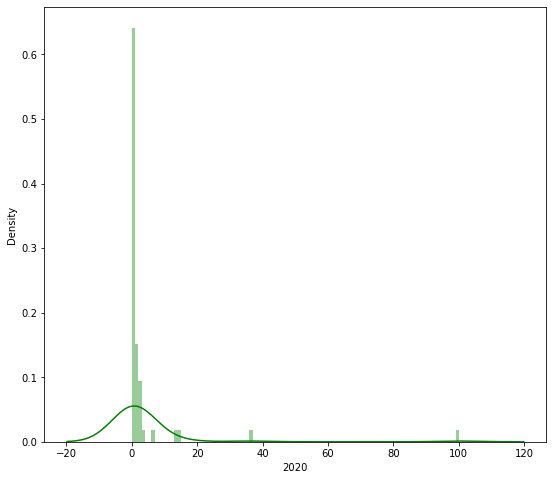

In [256]:
plt.figure(figsize=(9, 8))
sns.distplot(df['2020'], color='g', bins=100, hist_kws={'alpha': 0.4})

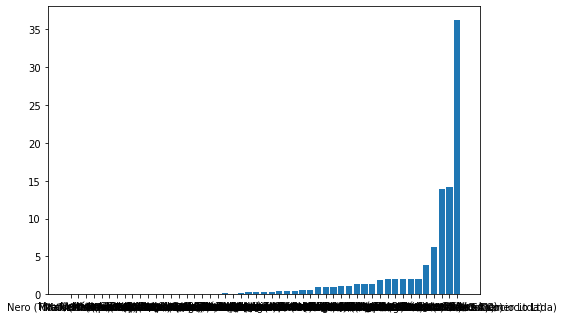

In [75]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
brand = dfa['Brand Name (GBO)']
year2020 = dfa['2020']
ax.bar(brand,year2020)
plt.show()

# Início da análise de mercado

## Vamos verificar agora o cenário atual de distribuição das maiores marcas

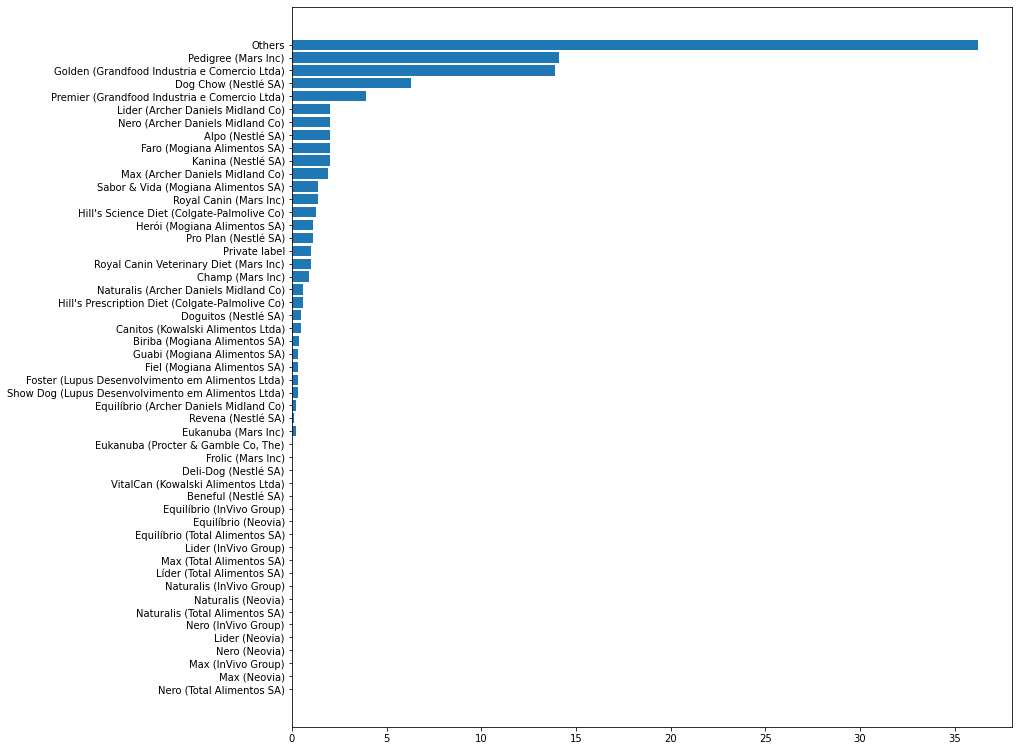

In [90]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0,0,1,1])
brand = dfa['Brand Name (GBO)']
year2020 = dfa['2020']

ax.barh(brand, year2020, align='center')

plt.show()

In [260]:
dfa_select = dfa.tail(10)

In [261]:
dfa_select

4,Geography,Category,Brand Name (GBO),Company Name (NBO),Data Type,2015,2016,2017,2018,2019,2020
13,Brazil,Dog Food,Kanina (Nestlé SA),Nestlé Brasil Ltda,Retail Value RSP,2.1,2.0,1.9,1.9,1.8,2.0
12,Brazil,Dog Food,Faro (Mogiana Alimentos SA),Mogiana Alimentos SA,Retail Value RSP,2.0,2.0,2.1,2.1,2.0,2.0
11,Brazil,Dog Food,Alpo (Nestlé SA),Nestlé Brasil Ltda,Retail Value RSP,2.2,2.1,2.1,2.0,2.1,2.0
10,Brazil,Dog Food,Nero (Archer Daniels Midland Co),Total Alimentos SA,Retail Value RSP,0.0,0.0,0.0,0.0,1.9,2.0
9,Brazil,Dog Food,Lider (Archer Daniels Midland Co),Total Alimentos SA,Retail Value RSP,0.0,0.0,0.0,0.0,1.9,2.0
8,Brazil,Dog Food,Premier (Grandfood Industria e Comercio Ltda),Grandfood Industria e Comercio Ltda,Retail Value RSP,2.7,2.8,2.9,3.1,3.4,3.9
7,Brazil,Dog Food,Dog Chow (Nestlé SA),Nestlé Brasil Ltda,Retail Value RSP,6.9,6.8,6.7,6.5,6.7,6.3
6,Brazil,Dog Food,Golden (Grandfood Industria e Comercio Ltda),Grandfood Industria e Comercio Ltda,Retail Value RSP,5.5,7.6,9.5,11.2,12.8,13.9
5,Brazil,Dog Food,Pedigree (Mars Inc),Mars Brasil Alimentos Ltda,Retail Value RSP,15.4,14.2,14.4,14.5,14.9,14.1
56,Brazil,Dog Food,Others,Others,Retail Value RSP,42.4,41.7,40.1,38.5,36.8,36.2


In [262]:
dfa_select.columns

Index(['Geography', 'Category', 'Brand Name (GBO)', 'Company Name (NBO)',
       'Data Type', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object', name=4)

In [263]:
dfa_select = dfa_select[['Brand Name (GBO)', '2015','2016','2017','2018','2019','2020']]

In [264]:
dfa_select

4,Brand Name (GBO),2015,2016,2017,2018,2019,2020
13,Kanina (Nestlé SA),2.1,2.0,1.9,1.9,1.8,2.0
12,Faro (Mogiana Alimentos SA),2.0,2.0,2.1,2.1,2.0,2.0
11,Alpo (Nestlé SA),2.2,2.1,2.1,2.0,2.1,2.0
10,Nero (Archer Daniels Midland Co),0.0,0.0,0.0,0.0,1.9,2.0
9,Lider (Archer Daniels Midland Co),0.0,0.0,0.0,0.0,1.9,2.0
8,Premier (Grandfood Industria e Comercio Ltda),2.7,2.8,2.9,3.1,3.4,3.9
7,Dog Chow (Nestlé SA),6.9,6.8,6.7,6.5,6.7,6.3
6,Golden (Grandfood Industria e Comercio Ltda),5.5,7.6,9.5,11.2,12.8,13.9
5,Pedigree (Mars Inc),15.4,14.2,14.4,14.5,14.9,14.1
56,Others,42.4,41.7,40.1,38.5,36.8,36.2


In [265]:
dfa_select.index = dfa_select['Brand Name (GBO)']

In [267]:
dfa_select

4,Brand Name (GBO),2015,2016,2017,2018,2019,2020
Brand Name (GBO),,,,,,,
Kanina (Nestlé SA),Kanina (Nestlé SA),2.1,2.0,1.9,1.9,1.8,2.0
Faro (Mogiana Alimentos SA),Faro (Mogiana Alimentos SA),2.0,2.0,2.1,2.1,2.0,2.0
Alpo (Nestlé SA),Alpo (Nestlé SA),2.2,2.1,2.1,2.0,2.1,2.0
Nero (Archer Daniels Midland Co),Nero (Archer Daniels Midland Co),0.0,0.0,0.0,0.0,1.9,2.0
Lider (Archer Daniels Midland Co),Lider (Archer Daniels Midland Co),0.0,0.0,0.0,0.0,1.9,2.0
Premier (Grandfood Industria e Comercio Ltda),Premier (Grandfood Industria e Comercio Ltda),2.7,2.8,2.9,3.1,3.4,3.9
Dog Chow (Nestlé SA),Dog Chow (Nestlé SA),6.9,6.8,6.7,6.5,6.7,6.3
Golden (Grandfood Industria e Comercio Ltda),Golden (Grandfood Industria e Comercio Ltda),5.5,7.6,9.5,11.2,12.8,13.9
Pedigree (Mars Inc),Pedigree (Mars Inc),15.4,14.2,14.4,14.5,14.9,14.1


In [268]:
dfa_select.drop(['Brand Name (GBO)'], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [269]:
dfa_select

4,2015,2016,2017,2018,2019,2020
Brand Name (GBO),,,,,,
Kanina (Nestlé SA),2.1,2.0,1.9,1.9,1.8,2.0
Faro (Mogiana Alimentos SA),2.0,2.0,2.1,2.1,2.0,2.0
Alpo (Nestlé SA),2.2,2.1,2.1,2.0,2.1,2.0
Nero (Archer Daniels Midland Co),0.0,0.0,0.0,0.0,1.9,2.0
Lider (Archer Daniels Midland Co),0.0,0.0,0.0,0.0,1.9,2.0
Premier (Grandfood Industria e Comercio Ltda),2.7,2.8,2.9,3.1,3.4,3.9
Dog Chow (Nestlé SA),6.9,6.8,6.7,6.5,6.7,6.3
Golden (Grandfood Industria e Comercio Ltda),5.5,7.6,9.5,11.2,12.8,13.9
Pedigree (Mars Inc),15.4,14.2,14.4,14.5,14.9,14.1


<AxesSubplot:xlabel='Brand Name (GBO)'>

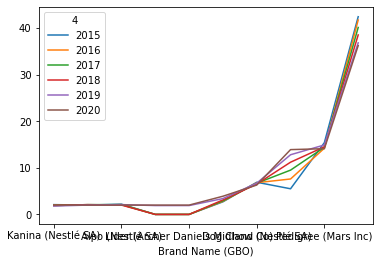

In [270]:
dfa_select.plot()

In [271]:
dfa_select.T

Brand Name (GBO),Kanina (Nestlé SA),Faro (Mogiana Alimentos SA),Alpo (Nestlé SA),Nero (Archer Daniels Midland Co),Lider (Archer Daniels Midland Co),Premier (Grandfood Industria e Comercio Ltda),Dog Chow (Nestlé SA),Golden (Grandfood Industria e Comercio Ltda),Pedigree (Mars Inc),Others
4,,,,,,,,,,
2015,2.1,2.0,2.2,0.0,0.0,2.7,6.9,5.5,15.4,42.4
2016,2.0,2.0,2.1,0.0,0.0,2.8,6.8,7.6,14.2,41.7
2017,1.9,2.1,2.1,0.0,0.0,2.9,6.7,9.5,14.4,40.1
2018,1.9,2.1,2.0,0.0,0.0,3.1,6.5,11.2,14.5,38.5
2019,1.8,2.0,2.1,1.9,1.9,3.4,6.7,12.8,14.9,36.8
2020,2.0,2.0,2.0,2.0,2.0,3.9,6.3,13.9,14.1,36.2


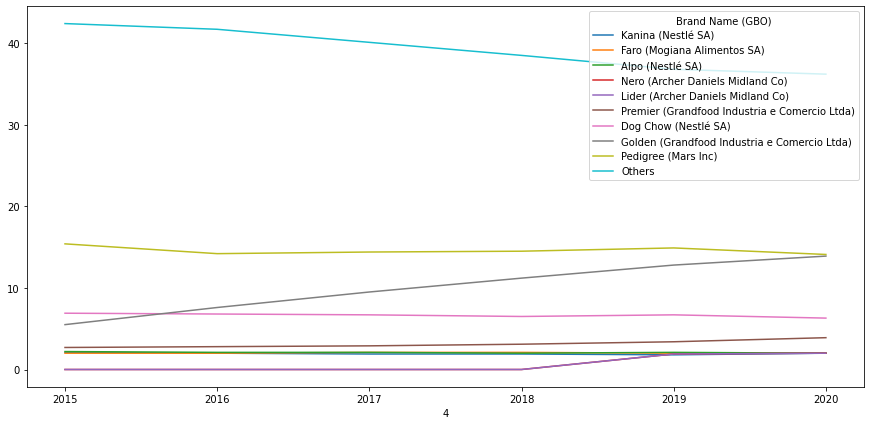

In [108]:
dfa_select.T.plot(figsize = (15,7));

In [272]:
dfa_select_transposto = dfa_select.T

In [273]:
dfa_select_transposto.head()

Brand Name (GBO),Kanina (Nestlé SA),Faro (Mogiana Alimentos SA),Alpo (Nestlé SA),Nero (Archer Daniels Midland Co),Lider (Archer Daniels Midland Co),Premier (Grandfood Industria e Comercio Ltda),Dog Chow (Nestlé SA),Golden (Grandfood Industria e Comercio Ltda),Pedigree (Mars Inc),Others
4,,,,,,,,,,
2015,2.1,2.0,2.2,0.0,0.0,2.7,6.9,5.5,15.4,42.4
2016,2.0,2.0,2.1,0.0,0.0,2.8,6.8,7.6,14.2,41.7
2017,1.9,2.1,2.1,0.0,0.0,2.9,6.7,9.5,14.4,40.1
2018,1.9,2.1,2.0,0.0,0.0,3.1,6.5,11.2,14.5,38.5
2019,1.8,2.0,2.1,1.9,1.9,3.4,6.7,12.8,14.9,36.8


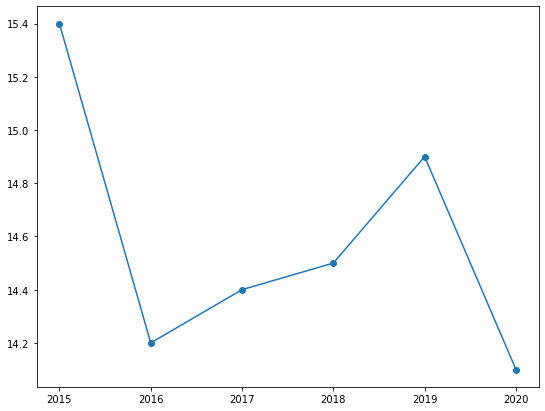

In [274]:
plt.plot(dfa_select_transposto[['Pedigree (Mars Inc)']] ,marker="o")
plt.gcf().set_size_inches(9, 7)
plt.show()

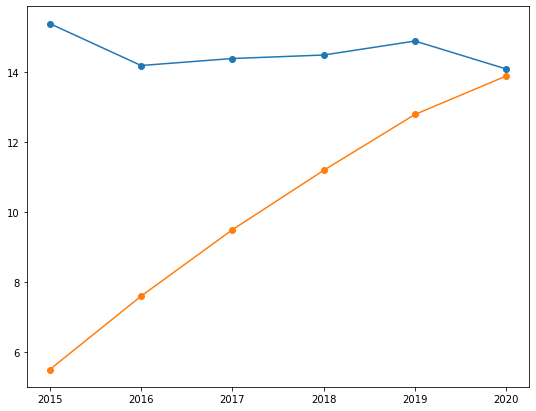

In [275]:
plt.plot(dfa_select_transposto[['Pedigree (Mars Inc)','Golden (Grandfood Industria e Comercio Ltda)']] ,marker="o")
plt.gcf().set_size_inches(9, 7)
plt.show()

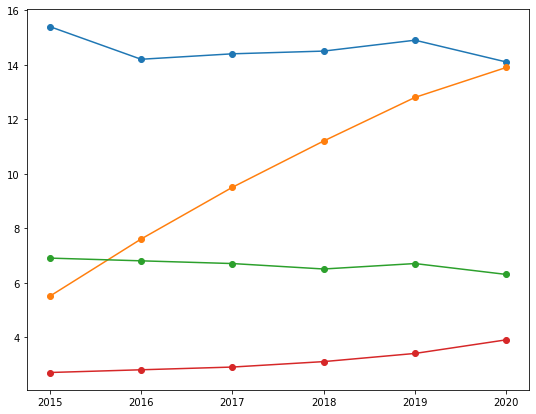

In [276]:
plt.plot(dfa_select_transposto[['Pedigree (Mars Inc)','Golden (Grandfood Industria e Comercio Ltda)','Dog Chow (Nestlé SA)','Premier (Grandfood Industria e Comercio Ltda)']] ,marker="o")
plt.gcf().set_size_inches(9, 7)
plt.show()

## Boxplots

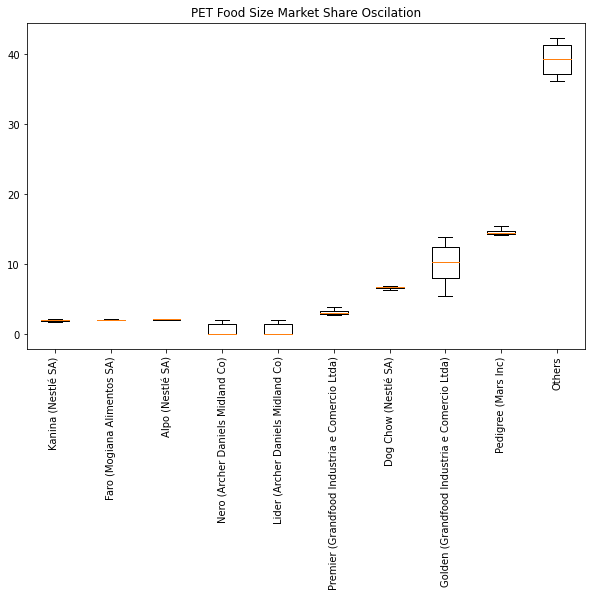

In [130]:
fig7, ax7 = plt.subplots(figsize = (10,6))
ax7.set_title('PET Food Size Market Share Oscilation')
ax7.boxplot(dfa_select_transposto, labels = dfa_select_transposto.columns)

plt.xticks(rotation=90)

plt.show()

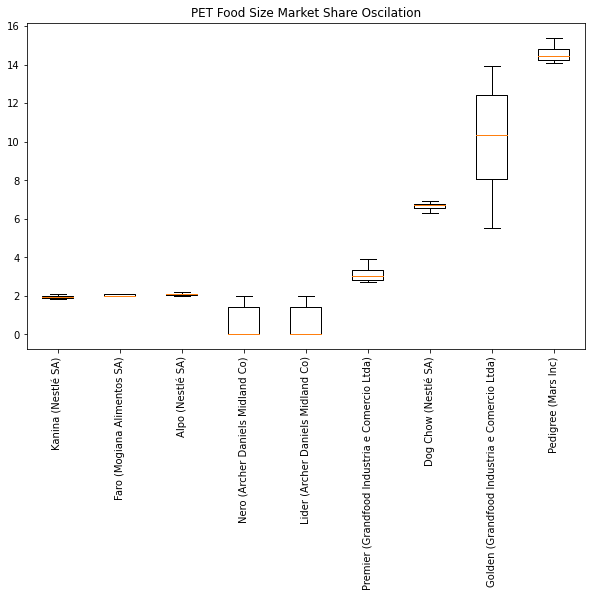

In [131]:
fig7, ax7 = plt.subplots(figsize = (10,6))
ax7.set_title('PET Food Size Market Share Oscilation')
ax7.boxplot(dfa_select_transposto.drop(['Others'], axis = 1), labels = dfa_select_transposto.drop(['Others'], axis = 1).columns)

plt.xticks(rotation=90)

plt.show()

## Vamos verificar algum dos outros dataframes

In [132]:
segundo = pd.read_excel(io='Passport_Stats_31-07-2021_2101_GMT (1).xls', sheet_name='Statistics Data')

In [133]:
segundo.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Company Shares | National - Historical Owner |...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Geography,Category,Company Name,Data Type,2015.0,2016,2017,2018,2019,2020


In [135]:
segundo.columns = segundo.iloc[4]

In [136]:
segundo.head()

4,Geography,Category,Company Name,Data Type,2015.0,2016,2017,2018,2019,2020
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Company Shares | National - Historical Owner |...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Geography,Category,Company Name,Data Type,2015.0,2016,2017,2018,2019,2020


In [137]:
segundo.drop([0,1,2,3,4], axis = 0, inplace = True)

In [138]:
segundo

4,Geography,Category,Company Name,Data Type,2015.0,2016,2017,2018,2019,2020
5,Brazil,Dog Food,Grandfood Industria e Comercio Ltda,Retail Value RSP,8.2,10.4,12.4,14.3,16.2,17.8
6,Brazil,Dog Food,Mars Brasil Alimentos Ltda,Retail Value RSP,16.4,15.5,15.6,15.7,16.2,15.5
7,Brazil,Dog Food,Nestlé Brasil Ltda,Retail Value RSP,13.1,13,12.9,12.3,12.3,12.1
8,Brazil,Dog Food,Total Alimentos SA,Retail Value RSP,8.4,8.3,8.4,8.7,8.6,8.4
9,Brazil,Dog Food,Mogiana Alimentos SA,Retail Value RSP,5.5,5.4,5.5,5.8,5.7,5.6
10,Brazil,Dog Food,Royal Canin do Brasil Indústria e Comércio Ltda,Retail Value RSP,2.9,2.7,2.5,2.3,2.4,2.4
11,Brazil,Dog Food,Colgate-Palmolive Indústria e Comércio Ltda,Retail Value RSP,1.6,1.7,1.7,1.7,1.7,1.9
12,Brazil,Dog Food,Lupus Desenvolvimento em Alimentos Ltda,Retail Value RSP,2.8,2.4,2,1.7,1.4,1.4
13,Brazil,Dog Food,Kowalski Alimentos Ltda,Retail Value RSP,1.2,1.2,1.1,1,0.6,0.5
14,Brazil,Dog Food,Iams do Brasil SA,Retail Value RSP,0.1,-,-,-,-,-


In [139]:
segundo_a = segundo.replace('-', '0')

In [140]:
segundo_a

4,Geography,Category,Company Name,Data Type,2015.0,2016,2017,2018,2019,2020
5,Brazil,Dog Food,Grandfood Industria e Comercio Ltda,Retail Value RSP,8.2,10.4,12.4,14.3,16.2,17.8
6,Brazil,Dog Food,Mars Brasil Alimentos Ltda,Retail Value RSP,16.4,15.5,15.6,15.7,16.2,15.5
7,Brazil,Dog Food,Nestlé Brasil Ltda,Retail Value RSP,13.1,13,12.9,12.3,12.3,12.1
8,Brazil,Dog Food,Total Alimentos SA,Retail Value RSP,8.4,8.3,8.4,8.7,8.6,8.4
9,Brazil,Dog Food,Mogiana Alimentos SA,Retail Value RSP,5.5,5.4,5.5,5.8,5.7,5.6
10,Brazil,Dog Food,Royal Canin do Brasil Indústria e Comércio Ltda,Retail Value RSP,2.9,2.7,2.5,2.3,2.4,2.4
11,Brazil,Dog Food,Colgate-Palmolive Indústria e Comércio Ltda,Retail Value RSP,1.6,1.7,1.7,1.7,1.7,1.9
12,Brazil,Dog Food,Lupus Desenvolvimento em Alimentos Ltda,Retail Value RSP,2.8,2.4,2,1.7,1.4,1.4
13,Brazil,Dog Food,Kowalski Alimentos Ltda,Retail Value RSP,1.2,1.2,1.1,1,0.6,0.5
14,Brazil,Dog Food,Iams do Brasil SA,Retail Value RSP,0.1,0,0,0,0,0


In [141]:
segundo_b = segundo_a.dropna()

In [142]:
segundo_b

4,Geography,Category,Company Name,Data Type,2015.0,2016,2017,2018,2019,2020
5,Brazil,Dog Food,Grandfood Industria e Comercio Ltda,Retail Value RSP,8.2,10.4,12.4,14.3,16.2,17.8
6,Brazil,Dog Food,Mars Brasil Alimentos Ltda,Retail Value RSP,16.4,15.5,15.6,15.7,16.2,15.5
7,Brazil,Dog Food,Nestlé Brasil Ltda,Retail Value RSP,13.1,13,12.9,12.3,12.3,12.1
8,Brazil,Dog Food,Total Alimentos SA,Retail Value RSP,8.4,8.3,8.4,8.7,8.6,8.4
9,Brazil,Dog Food,Mogiana Alimentos SA,Retail Value RSP,5.5,5.4,5.5,5.8,5.7,5.6
10,Brazil,Dog Food,Royal Canin do Brasil Indústria e Comércio Ltda,Retail Value RSP,2.9,2.7,2.5,2.3,2.4,2.4
11,Brazil,Dog Food,Colgate-Palmolive Indústria e Comércio Ltda,Retail Value RSP,1.6,1.7,1.7,1.7,1.7,1.9
12,Brazil,Dog Food,Lupus Desenvolvimento em Alimentos Ltda,Retail Value RSP,2.8,2.4,2,1.7,1.4,1.4
13,Brazil,Dog Food,Kowalski Alimentos Ltda,Retail Value RSP,1.2,1.2,1.1,1,0.6,0.5
14,Brazil,Dog Food,Iams do Brasil SA,Retail Value RSP,0.1,0,0,0,0,0


In [144]:
segundo_b.dtypes

4
Geography        object
Category         object
Company Name     object
Data Type        object
2015.0          float64
2016             object
2017             object
2018             object
2019             object
2020             object
dtype: object

In [146]:
segundo_b.columns

Index([   'Geography',     'Category', 'Company Name',    'Data Type',
               2015.0,         '2016',         '2017',         '2018',
               '2019',         '2020'],
      dtype='object', name=4)

In [147]:
cols = [2015.0,'2016','2017','2018','2019','2020']
segundo_b[cols] = segundo_b[cols].apply(pd.to_numeric, errors='coerce')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [148]:
segundo_c = segundo_b.sort_values(by = ['2020'], axis = 0, ascending = 'False')

In [149]:
segundo_c

4,Geography,Category,Company Name,Data Type,2015.0,2016,2017,2018,2019,2020
14,Brazil,Dog Food,Iams do Brasil SA,Retail Value RSP,0.1,0.0,0.0,0.0,0.0,0.0
13,Brazil,Dog Food,Kowalski Alimentos Ltda,Retail Value RSP,1.2,1.2,1.1,1.0,0.6,0.5
15,Brazil,Dog Food,Private Label,Retail Value RSP,1.0,1.0,1.0,1.0,0.9,1.0
12,Brazil,Dog Food,Lupus Desenvolvimento em Alimentos Ltda,Retail Value RSP,2.8,2.4,2.0,1.7,1.4,1.4
11,Brazil,Dog Food,Colgate-Palmolive Indústria e Comércio Ltda,Retail Value RSP,1.6,1.7,1.7,1.7,1.7,1.9
10,Brazil,Dog Food,Royal Canin do Brasil Indústria e Comércio Ltda,Retail Value RSP,2.9,2.7,2.5,2.3,2.4,2.4
9,Brazil,Dog Food,Mogiana Alimentos SA,Retail Value RSP,5.5,5.4,5.5,5.8,5.7,5.6
8,Brazil,Dog Food,Total Alimentos SA,Retail Value RSP,8.4,8.3,8.4,8.7,8.6,8.4
7,Brazil,Dog Food,Nestlé Brasil Ltda,Retail Value RSP,13.1,13.0,12.9,12.3,12.3,12.1
6,Brazil,Dog Food,Mars Brasil Alimentos Ltda,Retail Value RSP,16.4,15.5,15.6,15.7,16.2,15.5


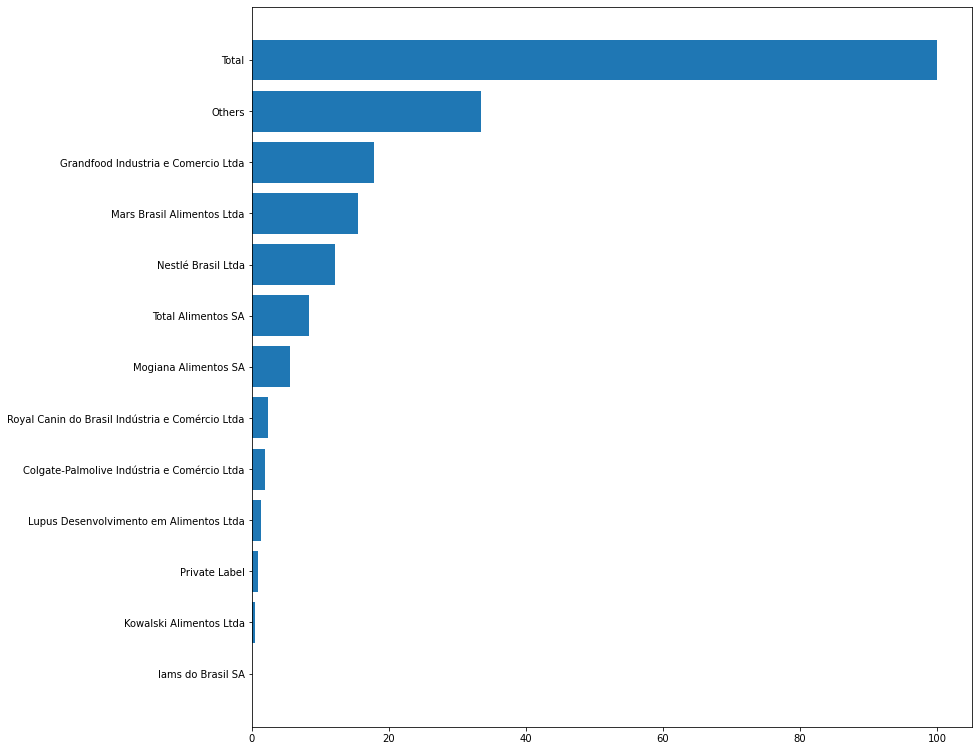

In [150]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0,0,1,1])
brand = segundo_c['Company Name']
year2020 = segundo_c['2020']

ax.barh(brand, year2020, align='center')

plt.show()

In [153]:
segundo_d = segundo_c[['Company Name',2015.0,'2016','2017','2018','2019','2020']]

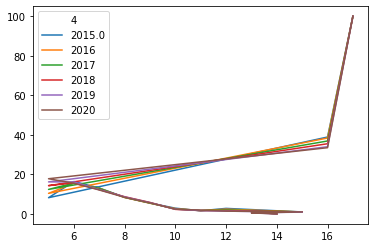

In [154]:
segundo_d.plot();

In [157]:
segundo_d.dtypes

4
Company Name     object
2015.0          float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
dtype: object

In [160]:
segundo_e = segundo_d.T

In [161]:
segundo_e

,14,13,15,12,11,10,9,8,7,6,5,16,17
4,,,,,,,,,,,,,
Company Name,Iams do Brasil SA,Kowalski Alimentos Ltda,Private Label,Lupus Desenvolvimento em Alimentos Ltda,Colgate-Palmolive Indústria e Comércio Ltda,Royal Canin do Brasil Indústria e Comércio Ltda,Mogiana Alimentos SA,Total Alimentos SA,Nestlé Brasil Ltda,Mars Brasil Alimentos Ltda,Grandfood Industria e Comercio Ltda,Others,Total
2015.0,0.1,1.2,1,2.8,1.6,2.9,5.5,8.4,13.1,16.4,8.2,38.9,100
2016,0,1.2,1,2.4,1.7,2.7,5.4,8.3,13,15.5,10.4,38.4,100
2017,0,1.1,1,2,1.7,2.5,5.5,8.4,12.9,15.6,12.4,36.9,100
2018,0,1,1,1.7,1.7,2.3,5.8,8.7,12.3,15.7,14.3,35.5,100
2019,0,0.6,0.9,1.4,1.7,2.4,5.7,8.6,12.3,16.2,16.2,34,100
2020,0,0.5,1,1.4,1.9,2.4,5.6,8.4,12.1,15.5,17.8,33.5,100


In [165]:
new_header = segundo_e.iloc[0] #grab the first row for the header
segundo_f = segundo_e[1:] #take the data less the header row
segundo_f.columns = new_header #set the header row as the df header

In [166]:
segundo_f

Company Name,Iams do Brasil SA,Kowalski Alimentos Ltda,Private Label,Lupus Desenvolvimento em Alimentos Ltda,Colgate-Palmolive Indústria e Comércio Ltda,Royal Canin do Brasil Indústria e Comércio Ltda,Mogiana Alimentos SA,Total Alimentos SA,Nestlé Brasil Ltda,Mars Brasil Alimentos Ltda,Grandfood Industria e Comercio Ltda,Others,Total
4,,,,,,,,,,,,,
2015.0,0.1,1.2,1,2.8,1.6,2.9,5.5,8.4,13.1,16.4,8.2,38.9,100
2016,0,1.2,1,2.4,1.7,2.7,5.4,8.3,13,15.5,10.4,38.4,100
2017,0,1.1,1,2,1.7,2.5,5.5,8.4,12.9,15.6,12.4,36.9,100
2018,0,1,1,1.7,1.7,2.3,5.8,8.7,12.3,15.7,14.3,35.5,100
2019,0,0.6,0.9,1.4,1.7,2.4,5.7,8.6,12.3,16.2,16.2,34,100
2020,0,0.5,1,1.4,1.9,2.4,5.6,8.4,12.1,15.5,17.8,33.5,100


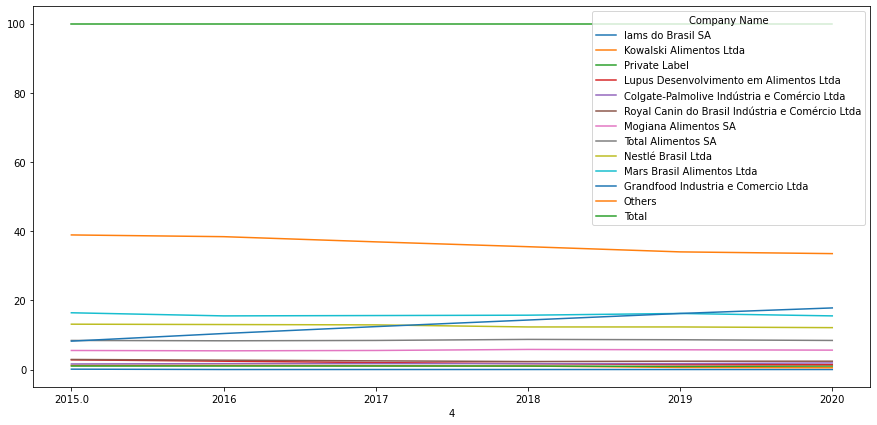

In [167]:
segundo_f.plot(figsize = (15,7));

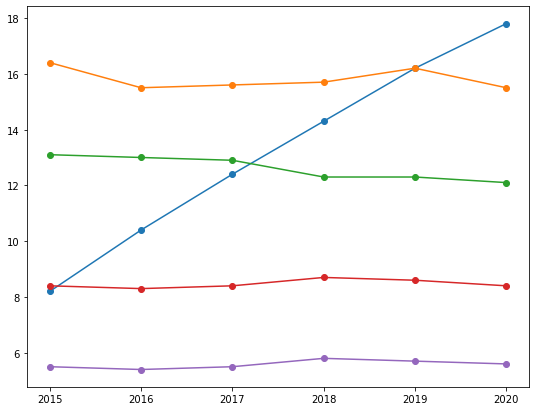

In [172]:
plt.plot(segundo_f[['Grandfood Industria e Comercio Ltda','Mars Brasil Alimentos Ltda','Nestlé Brasil Ltda','Total Alimentos SA','Mogiana Alimentos SA']] ,marker="o")
plt.gcf().set_size_inches(9, 7)
#plt.legend(loc="upper left")
plt.show()

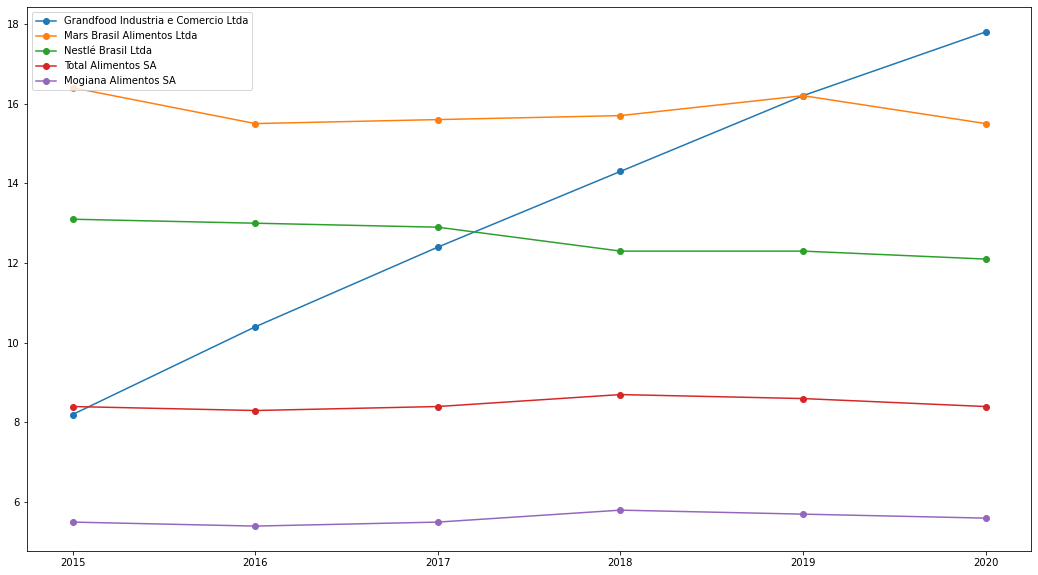

In [181]:
plt.plot(segundo_f[['Grandfood Industria e Comercio Ltda','Mars Brasil Alimentos Ltda','Nestlé Brasil Ltda','Total Alimentos SA','Mogiana Alimentos SA']] ,marker="o")
plt.gcf().set_size_inches(18, 10)
plt.legend(['Grandfood Industria e Comercio Ltda','Mars Brasil Alimentos Ltda','Nestlé Brasil Ltda','Total Alimentos SA','Mogiana Alimentos SA'], loc="upper left")
plt.show()

In [182]:
segundo_f

Company Name,Iams do Brasil SA,Kowalski Alimentos Ltda,Private Label,Lupus Desenvolvimento em Alimentos Ltda,Colgate-Palmolive Indústria e Comércio Ltda,Royal Canin do Brasil Indústria e Comércio Ltda,Mogiana Alimentos SA,Total Alimentos SA,Nestlé Brasil Ltda,Mars Brasil Alimentos Ltda,Grandfood Industria e Comercio Ltda,Others,Total
4,,,,,,,,,,,,,
2015.0,0.1,1.2,1,2.8,1.6,2.9,5.5,8.4,13.1,16.4,8.2,38.9,100
2016,0,1.2,1,2.4,1.7,2.7,5.4,8.3,13,15.5,10.4,38.4,100
2017,0,1.1,1,2,1.7,2.5,5.5,8.4,12.9,15.6,12.4,36.9,100
2018,0,1,1,1.7,1.7,2.3,5.8,8.7,12.3,15.7,14.3,35.5,100
2019,0,0.6,0.9,1.4,1.7,2.4,5.7,8.6,12.3,16.2,16.2,34,100
2020,0,0.5,1,1.4,1.9,2.4,5.6,8.4,12.1,15.5,17.8,33.5,100
